**Assignment II - A dashboard that explores a Spatial Dataset**.

I have designed the dashboard to visualize library data present on a map (US cities) using Folium and interactively filter the displayed libraries based on city and sector using IPywidgets.

The primary goal of the dashboard is to provide an intuitive interface for users to explore library locations within different cities in United States and sectors. Sectors represents two types that is public library and academic library. Users can select a specific city from the dropdown menu, choose a sector from the radio buttons, and optionally toggle the **Show All** checkbox to display libraries from all cities.

The map displays markers representing individual libraries, with each marker containing information such as the name, house number, street name, zip code, and sector of the library. These details are shown in a popup when the user clicks on a marker.
The dropdown menu for selecting the city dynamically updates radio buttons that is available sectors based on the selected city, ensuring that users can only choose sectors relevant to the selected city. The "Show All" checkbox allows users to view libraries across all cities if desired.

Overall, the dashboard provides an interactive and visually appealing way to explore library data spatially, allowing users to gain insights into library distribution across different cities.

**Scatter Plotting**

I have done the scatter plotting using my dataset.

This code imports library data from a CSV file, extracting latitude and longitude coordinates. It then creates a scatter plot using matplotlib, displaying each library location as a black circle marker on a grid with longitude on the x-axis and latitude on the y-axis. The plot visualizes the geographic distribution of libraries across the US.


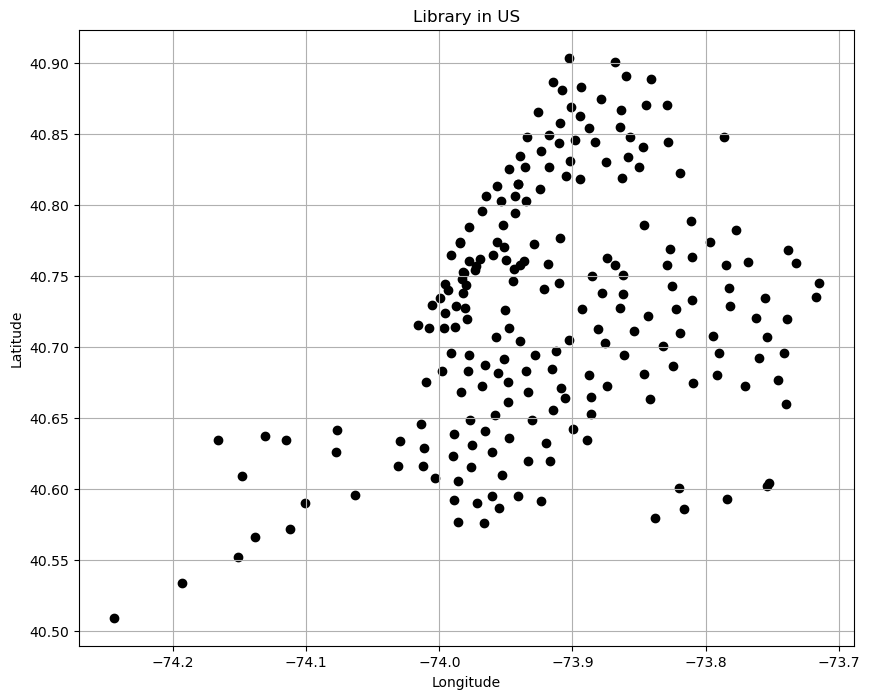

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
data = pd.read_csv('libraryData.csv')
data['latitude'] = data['the_geom'].apply(lambda x: float(re.findall(r"(-?\d+\.\d+)", x)[1]))
data['longitude'] = data['the_geom'].apply(lambda x: float(re.findall(r"(-?\d+\.\d+)", x)[0]))
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], color='black', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Library in US')
plt.grid(True)
plt.show()

**STATIC MAP:**

This code loads a dataset containing library information and calculates the mean latitude and longitude. Using Folium, it generates a static map cantered at the mean coordinates with a fixed zoom level and CartoDB Positron tiles. Each library location is represented by a black circle marker with a popup displaying its details. The resulting map provides a visual overview of library distribution across the dataset.

In [2]:
import pandas as pd
import folium
data = pd.read_csv('libraryData.csv')
data['latitude'] = data['the_geom'].apply(lambda x: float(re.findall(r"(-?\d+\.\d+)", x)[1]))
data['longitude'] = data['the_geom'].apply(lambda x: float(re.findall(r"(-?\d+\.\d+)", x)[0]))
map_center_lat = data['latitude'].mean()
map_center_long = data['longitude'].mean()
folium_map = folium.Map(location=[map_center_lat, map_center_long], zoom_start=10.5, tiles='CartoDB Positron', control_scale=True, zoom_control=False, scrollWheelZoom=False)
for idx, row in data.iterrows():
    popup_html = f"""
    <b>Name:</b> {row['NAME']}<br>
    <b>House Number:</b> {row['HOUSENUM']}<br>
    <b>Street Name:</b> {row['STREETNAME']}<br>
    <b>Zip Code:</b> {row['ZIP']}<br>
    """
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='black',
        fill=True,
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(folium_map)
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color='gray',
        fill=False,
    ).add_to(folium_map)
folium_map


**DATASET:**

libraryData.csv'. It contains information about libraries, including their names, addresses, zip codes, and sectors. The latitude and longitude of each library are extracted from the 'the_geom' column using regular expressions to parse the coordinate values. This dataset offers valuable insights into the geographical distribution of libraries across different cities and sectors. By visualizing this data on a map using Folium, users can explore the spatial patterns of libraries and analyze their distribution based on various criteria such as city and sector. The interactive widgets further enhance the exploration experience by allowing users to dynamically filter and analyze the data based on their preferences. Overall, these datasets provide a comprehensive understanding of library locations and facilitate informed decision-making in urban planning and resource allocation.

**DESIGNING**

The design which I chose in the presented layers, particularly in the Folium map visualization, are aimed at providing an intuitive and informative representation of the library data.

**Map Tiles:** The base map tiles are selected from the 'OpenStreetMap' provider. OpenStreetMap offers a detailed and up-to-date map dataset contributed by users worldwide. This choice ensures that the background map provides sufficient context for the library data visualization.
Marker Clustering: The use of Marker Cluster plugin in Folium helps manage large numbers of markers effectively. Its groups nearby markers into clusters at lower zoom levels to prevent overcrowding and improve map readability. This design choice ensures that the map remains visually appealing and informative even when zoomed out.

**Marker Icons:** The markers representing individual libraries are customized with icons to enhance their visual distinction. In this case, a black book icon is chosen to symbolize libraries, making it intuitive for users to identify library locations on the map.

**Popup Information:** Each marker on the map displays a popup containing detailed information about the corresponding library, including its name, house number, street name, zip code, and sector. This design choice ensures that users can access relevant information about libraries directly on the map, enhancing the map's utility for exploration and analysis.

**Interactive Widgets:** The addition of interactive widgets, including dropdown menus and checkboxes, allows users to dynamically filter the displayed data based on their preferences. For example, users can select a specific city and specific sector to view libraries in category wise and user can select all data without choosing the city if they want all over data. This interactive functionality enhances user engagement and facilitates data exploration.

**Performance Optimization:** Efforts are made to optimize the performance of the map visualization, particularly when dealing with large datasets. By utilizing techniques such as marker clustering and efficient data filtering, the map remains responsive and interactive even when displaying a substantial amount of data.

Overall, these design choices aim to create a visually appealing, informative, and user-friendly map visualization that enables users to explore and analyse library data effectively. By combining intuitive visual representations with interactive functionality, the map provides valuable insights into the spatial distribution of libraries and supports informed decision-making processes.


In [10]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import ipywidgets as widgets
from IPython.display import display
import re

data = pd.read_csv('libraryData.csv')
data['latitude'] = data['the_geom'].apply(lambda x: float(re.findall(r"(-?\d+\.\d+)", x)[1]))
data['longitude'] = data['the_geom'].apply(lambda x: float(re.findall(r"(-?\d+\.\d+)", x)[0]))

def create_map():
    map_center_lat = data['latitude'].mean()
    map_center_long = data['longitude'].mean()
    return folium.Map(location=[map_center_lat, map_center_long], zoom_start=10, tiles='OpenStreetMap')

def update_map(city, sector, show_all):
    folium_map = create_map()
    marker_cluster = MarkerCluster().add_to(folium_map)
    
    if show_all:
        subset = data
    else:
        subset = data[data['CITY'] == city]
    
    if sector != 'All':
        subset = subset[subset['SECTOR'] == sector]
    
    for idx, row in subset.iterrows():
        popup_html = f"""
        <b>Name:</b> {row['NAME']}<br>
        <b>House Number:</b> {row['HOUSENUM']}<br>
        <b>Street Name:</b> {row['STREETNAME']}<br>
        <b>Zip Code:</b> {row['ZIP']}<br>
        <b>Sector:</b> {row['SECTOR']}<br>
        """
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=folium.Popup(popup_html, max_width=300),
            icon=folium.Icon(icon='book', color='black')
        ).add_to(marker_cluster)
    display(folium_map)
    
def get_available_sectors(city):
    subset = data[data['CITY'] == city]
    unique_sectors = subset['SECTOR'].unique()
    if len(unique_sectors) == 1:  # If the city has only one sector
        return unique_sectors.tolist()
    else:
        return ['All'] + list(unique_sectors)

def city_dropdown_eventhandler(change):
    sector_radio_buttons.options = get_available_sectors(change.new)

city_dropdown = widgets.Dropdown(
    options=list(data['CITY'].unique()),
    description='Select City:',
    style={'description_width': 'initial', 'margin-right': '20px'},
    layout=widgets.Layout(width='25%')
)

city_dropdown.observe(city_dropdown_eventhandler, names='value')

show_all_checkbox = widgets.Checkbox(
    value=False,
    description='Show All',
    style={'description_width': 'initial', 'margin-right': '20px'},
    layout=widgets.Layout(width='25%')
)

sector_radio_buttons = widgets.RadioButtons(
    options=['All'] + list(data['SECTOR'].unique()),
    description='Select Sector:',
    style={'description_width': 'initial', 'margin-right': '20px'},
    layout=widgets.Layout(width='25%')
)

def show_all_eventhandler(change):
    if change.new:
        city_dropdown.disabled = True
    else:
        city_dropdown.disabled = False
    update_sector_options()

def update_sector_options():
    city = city_dropdown.value
    sector_radio_buttons.options = get_available_sectors(city)

show_all_checkbox.observe(show_all_eventhandler, names='value')
city_dropdown.disabled = show_all_checkbox.value
widgets.interactive(update_map, city=city_dropdown, sector=sector_radio_buttons, show_all=show_all_checkbox)

interactive(children=(Dropdown(description='Select City:', layout=Layout(width='25%'), options=('New York', 'B…

In crafting interactivity within the map visualization, my design choices prioritize user engagement, exploration, and ease of use.

**Zooming and Panning:** I enable smooth zooming and panning functionalities to allow users to navigate the map seamlessly. This ensures that users can explore different areas of interest with ease and precision, enhancing their overall experience.
Marker Clustering: To handle large datasets effectively, I implement marker clustering, which dynamically groups nearby markers as users zoom in and out of the map. This prevents cluttering and maintains map readability, even when dealing with a significant number of data points.

**Popup Information:** Interactive popups provide detailed information about each library location when users click on individual markers. This allows users to access relevant data directly on the map, facilitating exploration and analysis without needing to refer to external sources.

**Dropdown Menus and Checkboxes:** The inclusion of interactive widgets such as dropdown menus and checkboxes empower users to filter the displayed data based on their preferences. For example, users can select specific cities or sectors to focus on, refining the map visualization to suit their needs and interests.
Dynamic Data Updates: Whenever users interact with the widgets to filter the data, the map updates dynamically to reflect the changes instantly. This real-time feedback ensures that users can explore different facets of the data dynamically, promoting a more interactive and engaging experience.

**Responsive Layout:** The layout of interactive components is designed to be responsive, adapting seamlessly to different screen sizes and devices. This ensures consistent usability across various platforms and enhances accessibility for users accessing the map from different devices.

By incorporating these interactive elements into the map visualization, I aim to provide users with a rich and engaging experience that encourages exploration, analysis, and discovery of the library data presented.
